# Autotrader_2_eda
---

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Read in file

In [2]:
filepath = '../data/df_master.csv'

df = pd.read_csv(filepath, index_col=0)
print(df.shape)
df.head()

(14996, 21)


scr_header  \
0  Audi A4 Avant 2.0 TDI S line Special Edition 5dr   
1      Audi A3 1.6 TDI Sport Sportback S Tronic 5dr   
2                   Audi Q3 2.0 TFSI SE quattro 5dr   
3                  Audi A6 TDI ULTRA S LINE 2.0 4dr   
4                        Audi A5 1.8 TFSI Sport 2dr   

                    scr_attngrab  \
0  FULL S/HIST, NEW MOT,  EXTRAS   
1                   AUTO!! FSH!!   
2  Immaculate condition Must see   
3                  Sat Nav Ready   
4  PARKING SENSORS LEATHER SEATS   

                                           scr_descr  \
0  ['2008 (57 reg)', 'Estate', '115,000 miles', '...   
1  ['2011 (61 reg)', 'Hatchback', '112,988 miles'...   
2  ['2011 (61 reg)', 'SUV', '96,000 miles', '2.0L...   
3  ['2015 (65 reg)', 'Saloon', '97,837 miles', '2...   
4  ['2009 (58 reg)', 'Coupe', '67,345 miles', '1....   

                       scr_sellertype      scr_sellertown  scr_sellerrating  \
0    Trade seller - \nSee all 42 cars            brighton               5.0   
1    Trade seller - \nSee all 11 cars  bishop's stortford               4.9   
2     Trade seller - \nSee all 6 cars             stepney               4.8   
3  Trade seller - \nSee all 1450 cars             chatham               4.6   
4    Trade seller - \nSee all 91 cars          wandsworth               5.0   

  scr_price                                            scr_url    year  \
0    £3,995  /dealers/east-sussex/brighton/browns-autos-100...  2008.0   
1    £4,799  /dealers/hertfordshire/bishops-stortford/watso...  2011.0   
2    £8,740  /dealers/tower-hamlets/stepney/sutsi-cars-1001...  2011.0   
3   £10,900  /dealers/kent/chatham/big-motoring-world-10007657  2015.0   
4    £6,491  /dealers/borough-of-wandsworth/wandsworth/smar...  2009.0   

   reg_num  ...   mileage  engine_size  horsepower  transmission    fuel ulez  \
0     57.0  ...  115000.0          2.0       168.0        manual  diesel    0   
1     61.0  ...  112988.0          1.6       104.0     automatic  diesel    0   
2     61.0  ...   96000.0          2.0       168.0        manual  petrol    1   
3     65.0  ...   97837.0          2.0       190.0     automatic  diesel    1   
4     58.0  ...   67345.0          1.8       168.0        manual  petrol    1   

    seller_type  price  make model  
0  trade_seller   3995  audi    a4  
1  trade_seller   4799  audi    a3  
2  trade_seller   8740  audi    q3  
3  trade_seller  10900  audi    a6  
4  trade_seller   6491  audi    a5  

[5 rows x 21 columns]

# EDA
---

In [3]:
df.columns

Index(['scr_header', 'scr_attngrab', 'scr_descr', 'scr_sellertype',
       'scr_sellertown', 'scr_sellerrating', 'scr_price', 'scr_url', 'year',
       'reg_num', 'body', 'mileage', 'engine_size', 'horsepower',
       'transmission', 'fuel', 'ulez', 'seller_type', 'price', 'make',
       'model'],
      dtype='object')

In [4]:
df = df[['year', 'reg_num', 'body', 'mileage', 'engine_size', 'horsepower', 
        'transmission', 'fuel', 'ulez', 'seller_type', 'price', 'make', 'model']]

df.head()

year  reg_num       body   mileage  engine_size  horsepower transmission  \
0  2008.0     57.0     estate  115000.0          2.0       168.0       manual   
1  2011.0     61.0  hatchback  112988.0          1.6       104.0    automatic   
2  2011.0     61.0        suv   96000.0          2.0       168.0       manual   
3  2015.0     65.0     saloon   97837.0          2.0       190.0    automatic   
4  2009.0     58.0      coupe   67345.0          1.8       168.0       manual   

     fuel  ulez   seller_type  price  make model  
0  diesel     0  trade_seller   3995  audi    a4  
1  diesel     0  trade_seller   4799  audi    a3  
2  petrol     1  trade_seller   8740  audi    q3  
3  diesel     1  trade_seller  10900  audi    a6  
4  petrol     1  trade_seller   6491  audi    a5

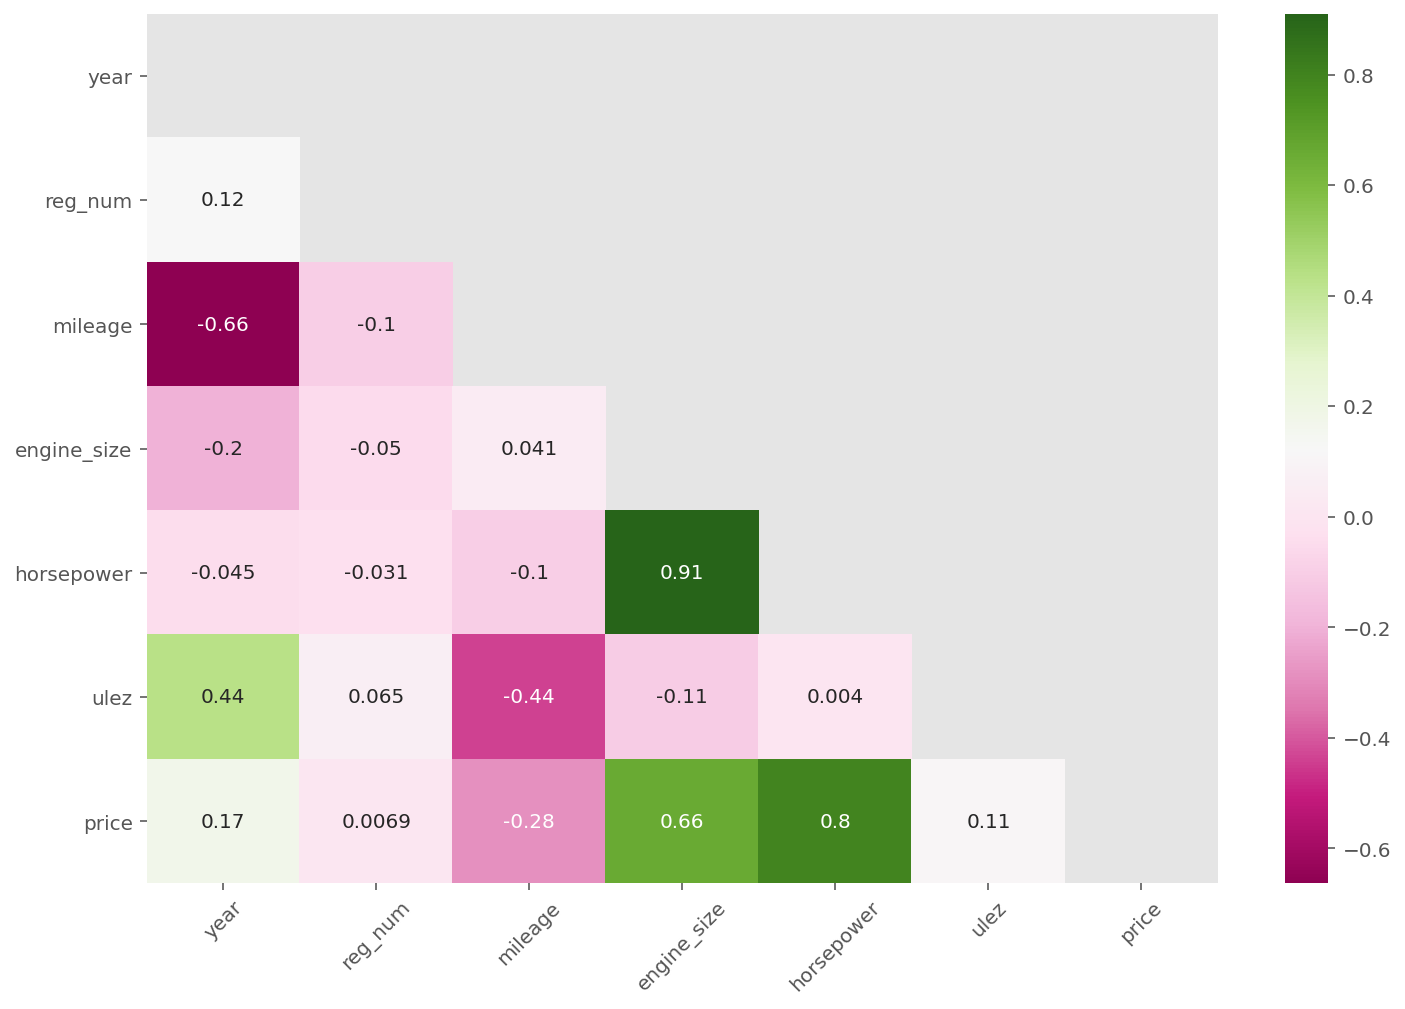

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), annot=True, cmap='PiYG', mask=mask, ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

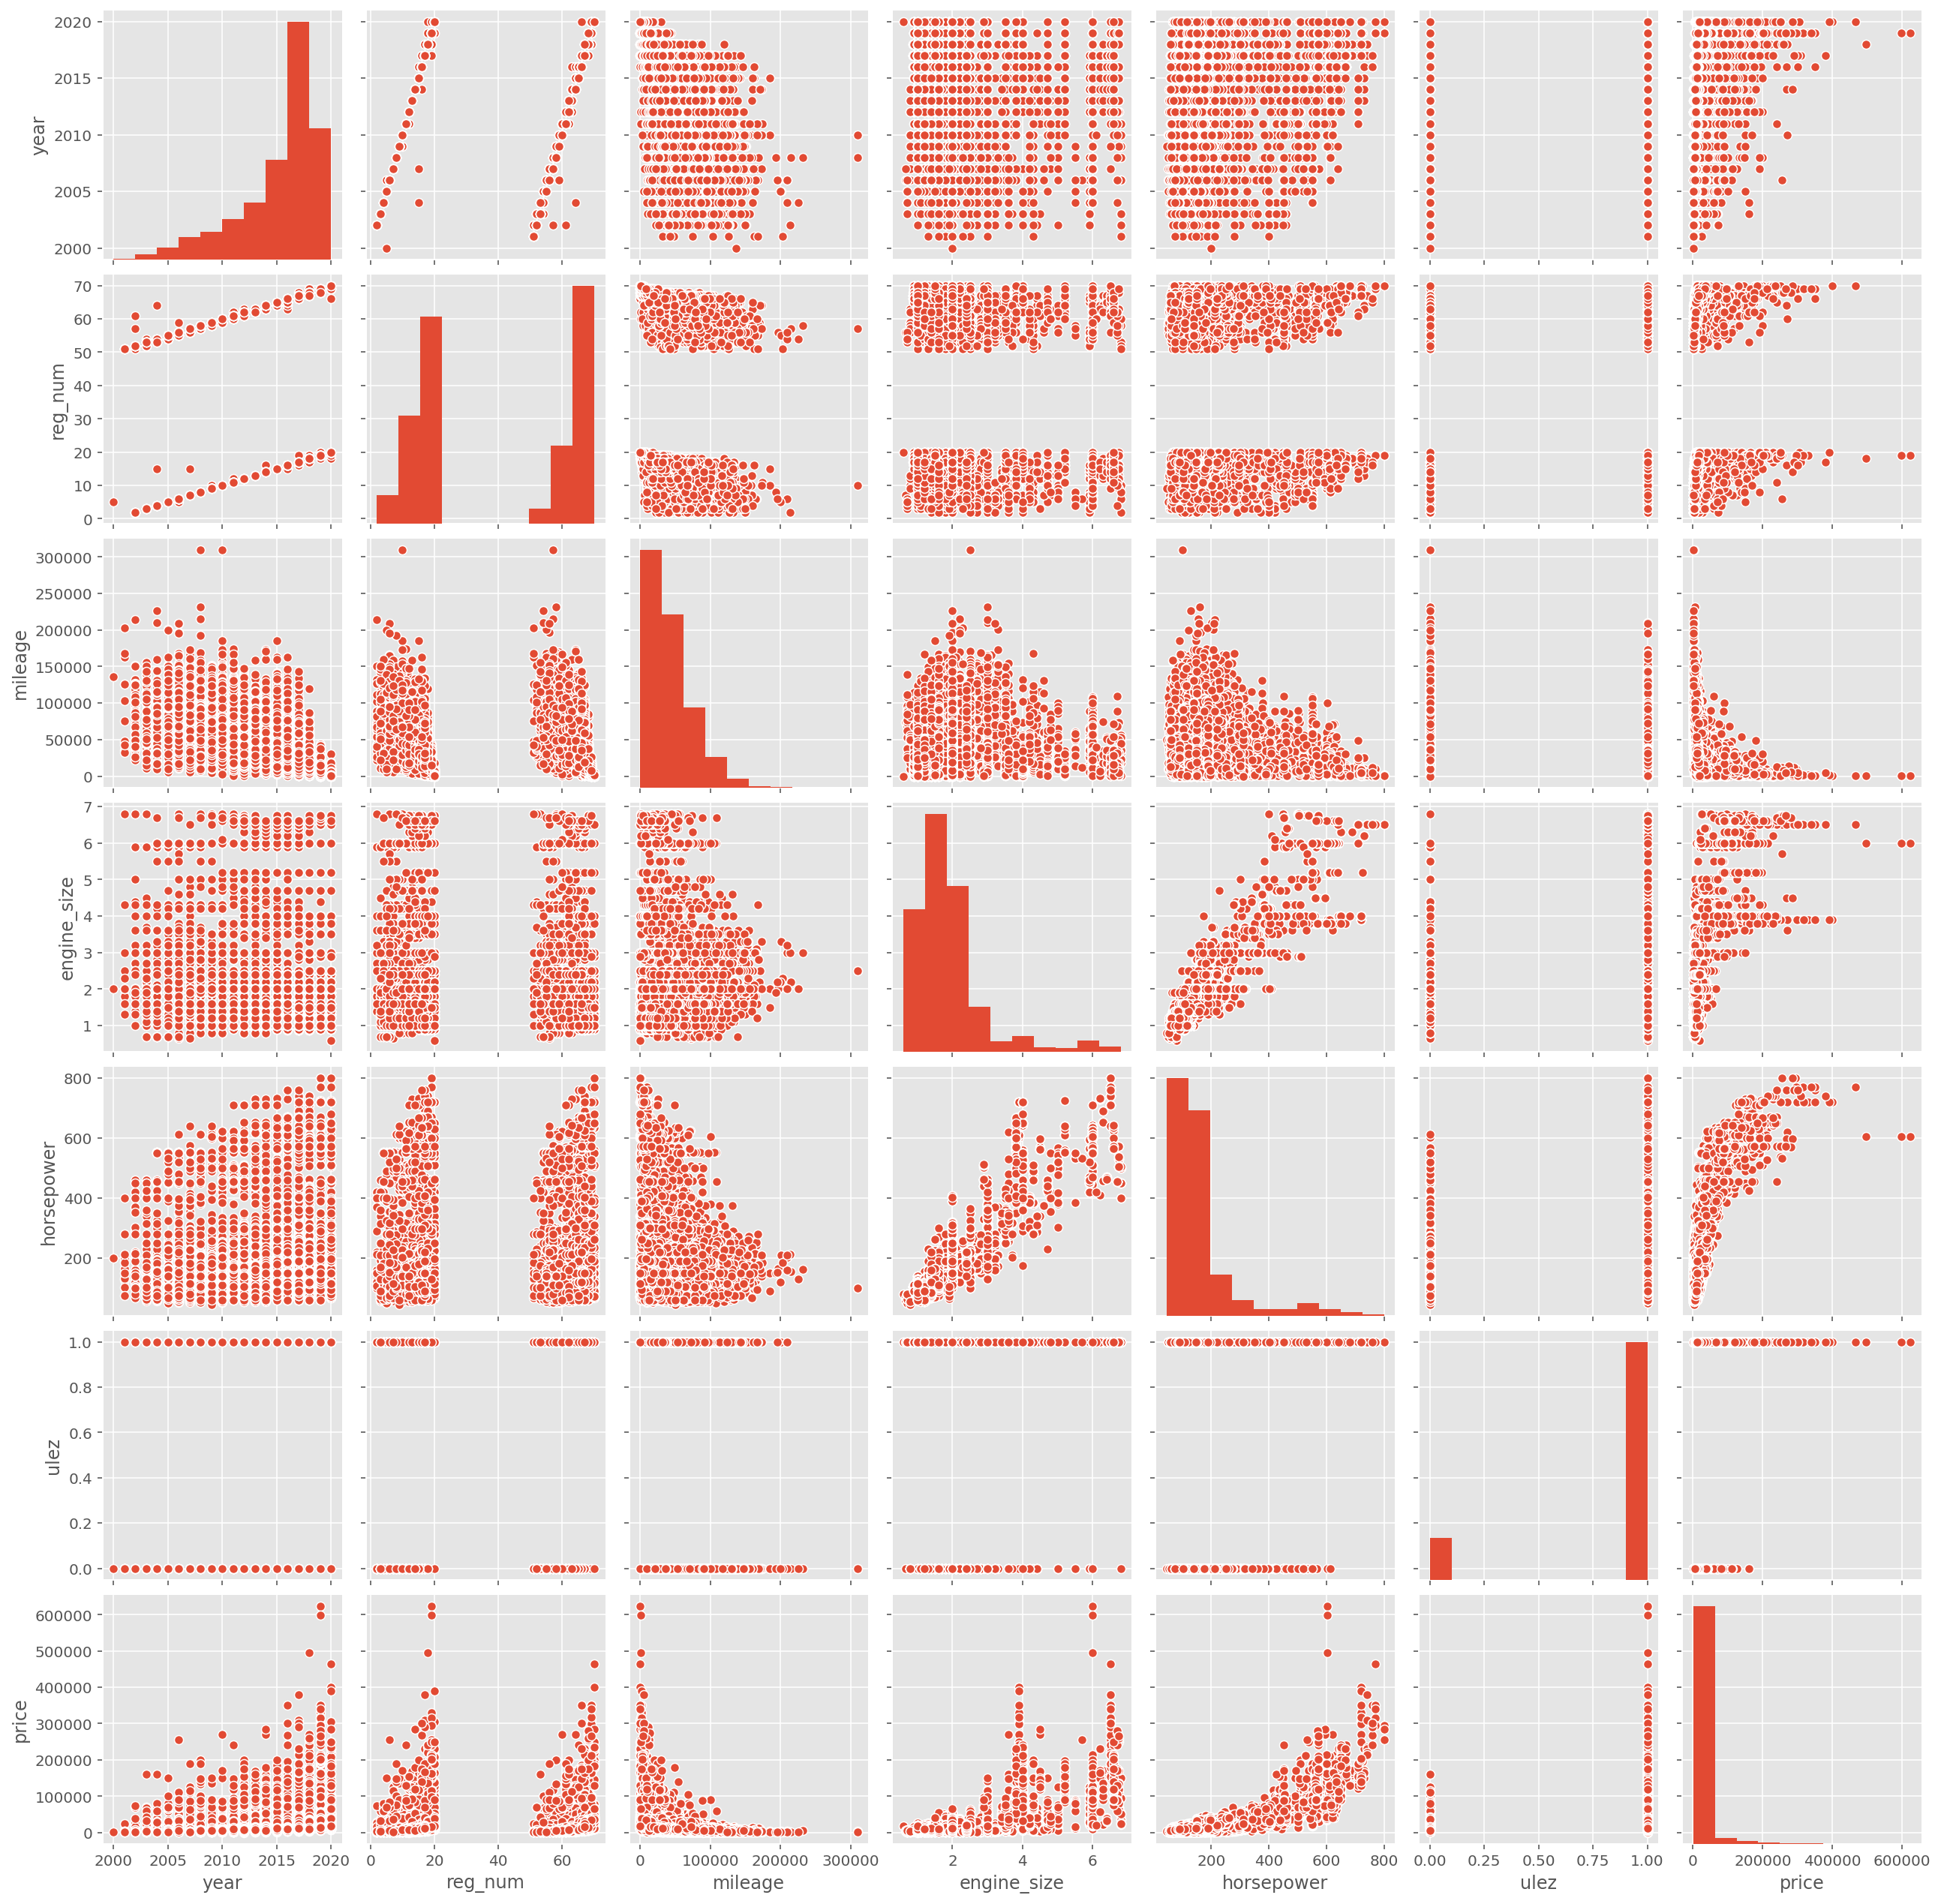

In [6]:
sns.pairplot(df)
plt.show()

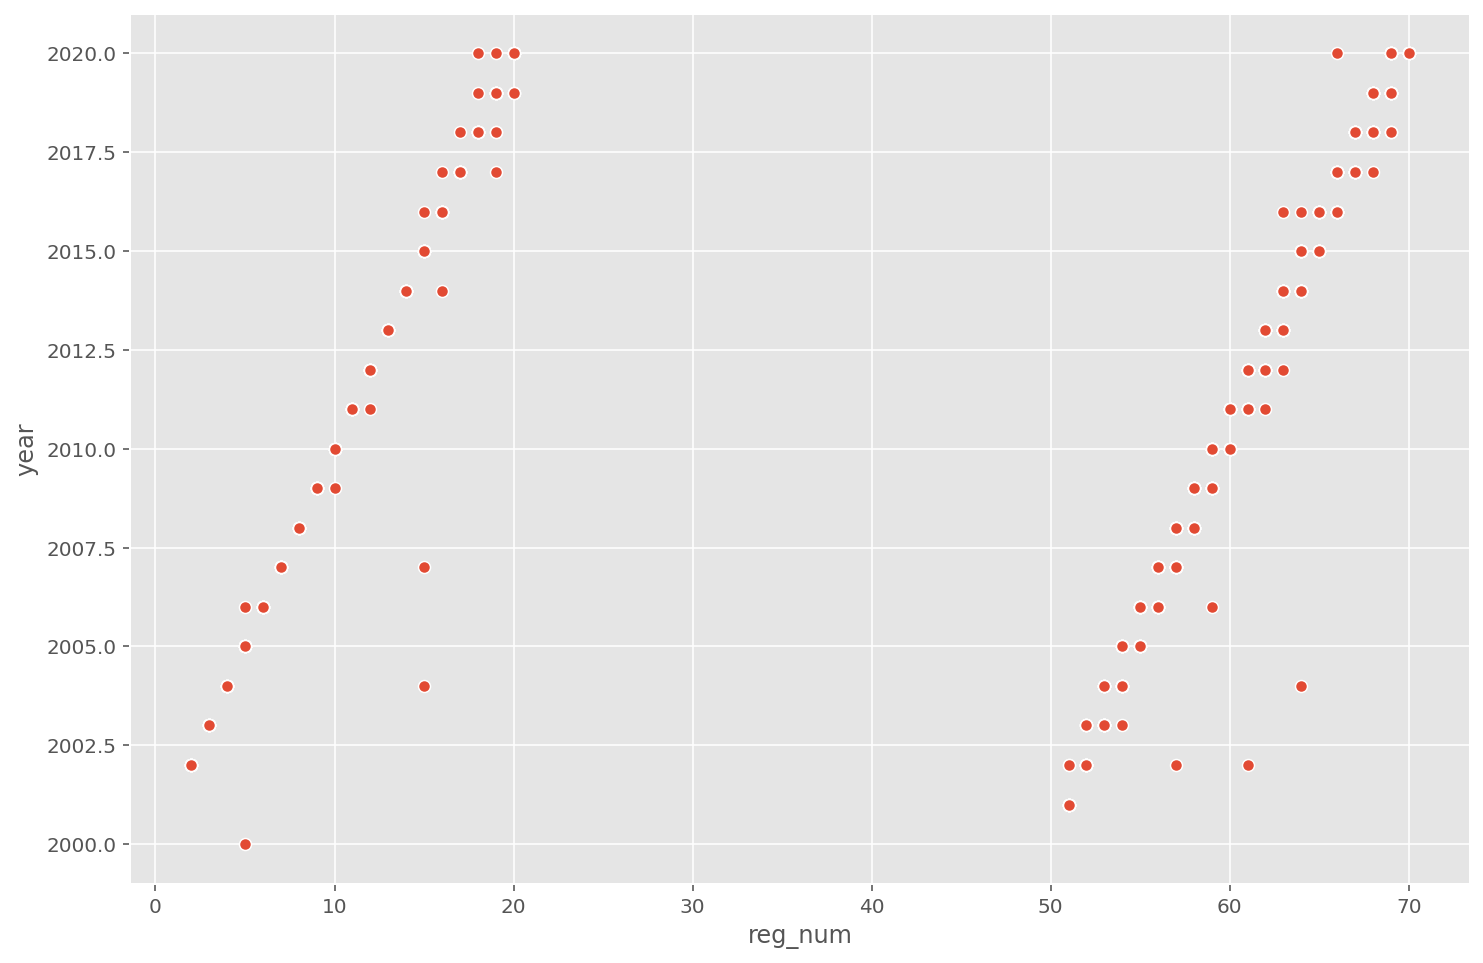

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.scatterplot(data=df, x='reg_num', y='year')
plt.show()

In [8]:
# drop reg_num due to almost perfect correlation with year (as expected)
df.drop(columns=['reg_num'], inplace=True)
df.head()

year       body   mileage  engine_size  horsepower transmission    fuel  \
0  2008.0     estate  115000.0          2.0       168.0       manual  diesel   
1  2011.0  hatchback  112988.0          1.6       104.0    automatic  diesel   
2  2011.0        suv   96000.0          2.0       168.0       manual  petrol   
3  2015.0     saloon   97837.0          2.0       190.0    automatic  diesel   
4  2009.0      coupe   67345.0          1.8       168.0       manual  petrol   

   ulez   seller_type  price  make model  
0     0  trade_seller   3995  audi    a4  
1     0  trade_seller   4799  audi    a3  
2     1  trade_seller   8740  audi    q3  
3     1  trade_seller  10900  audi    a6  
4     1  trade_seller   6491  audi    a5

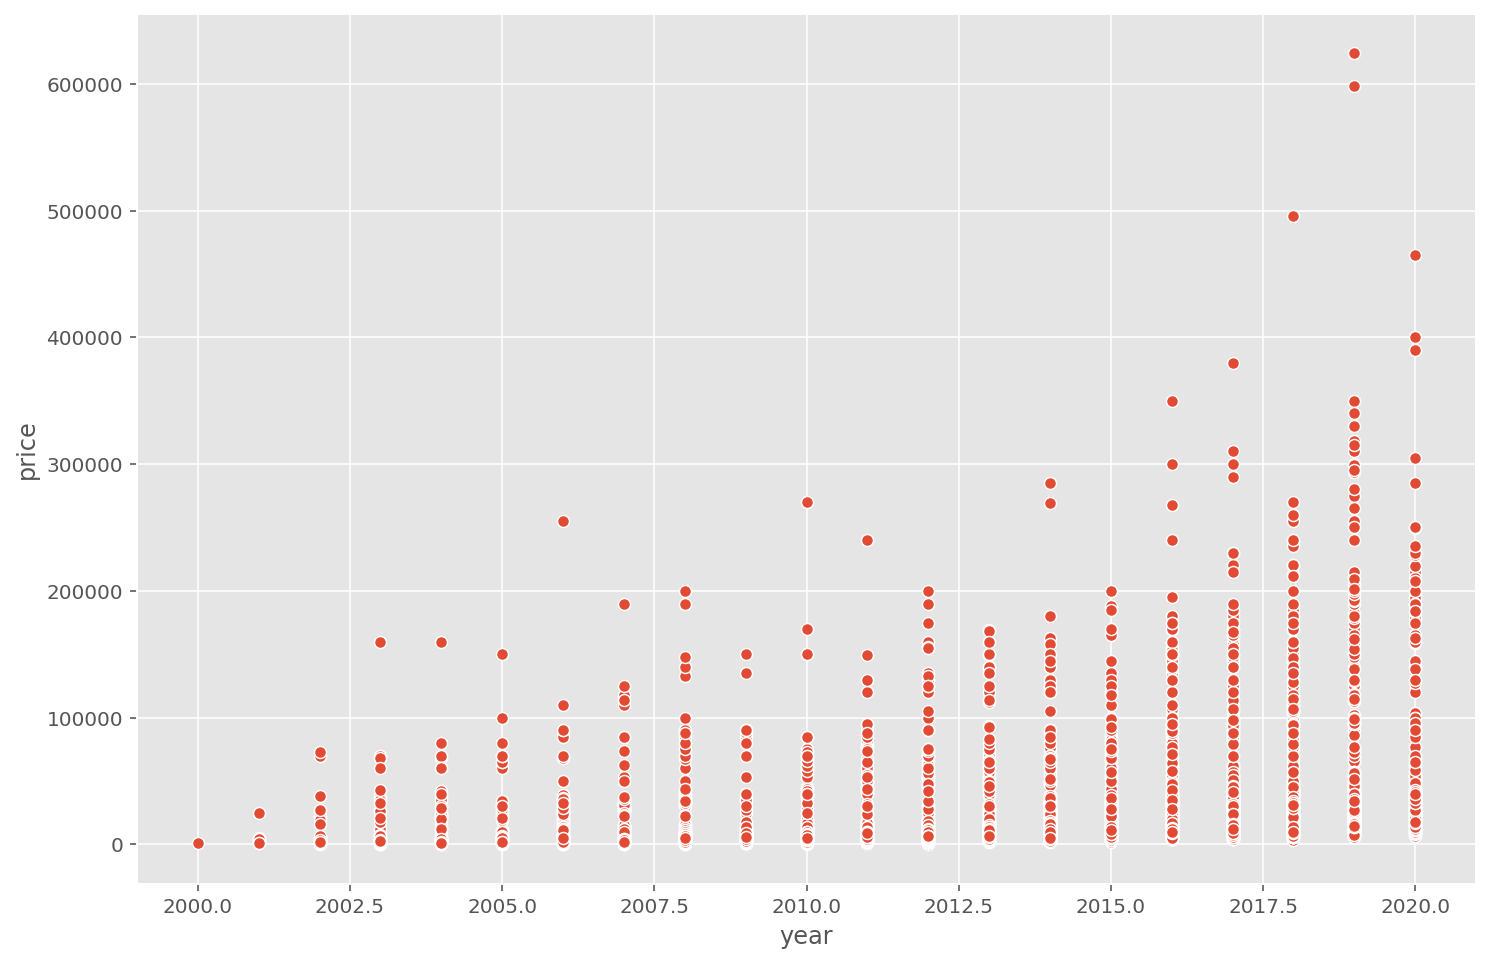

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.scatterplot(data=df, x='year', y='price')
plt.show()

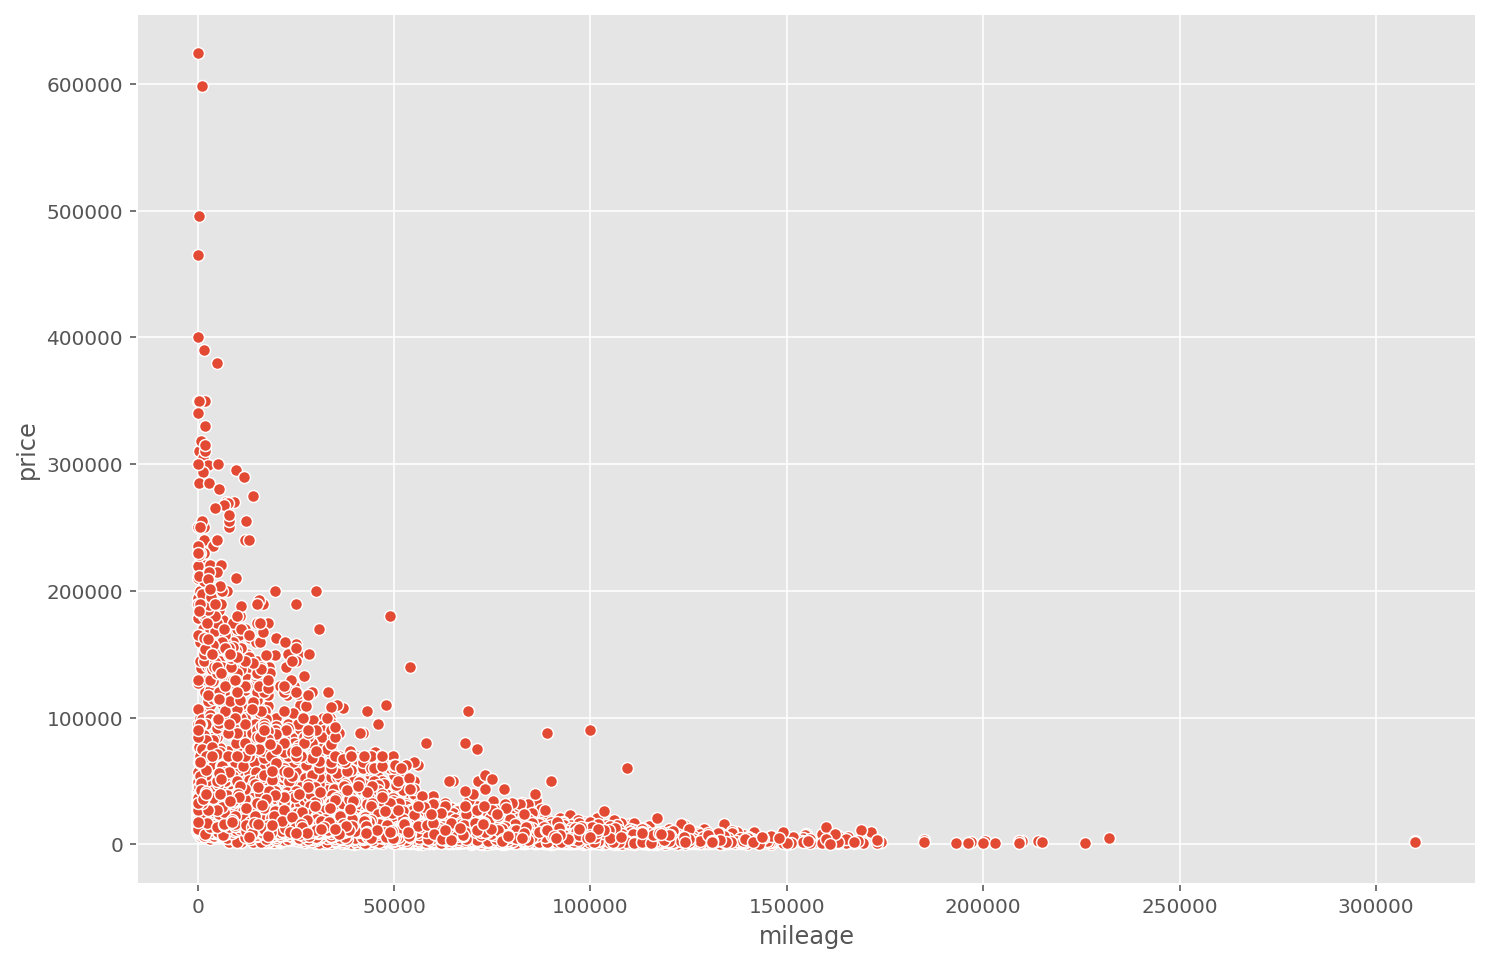

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.scatterplot(data=df, x='mileage', y='price')
plt.show()

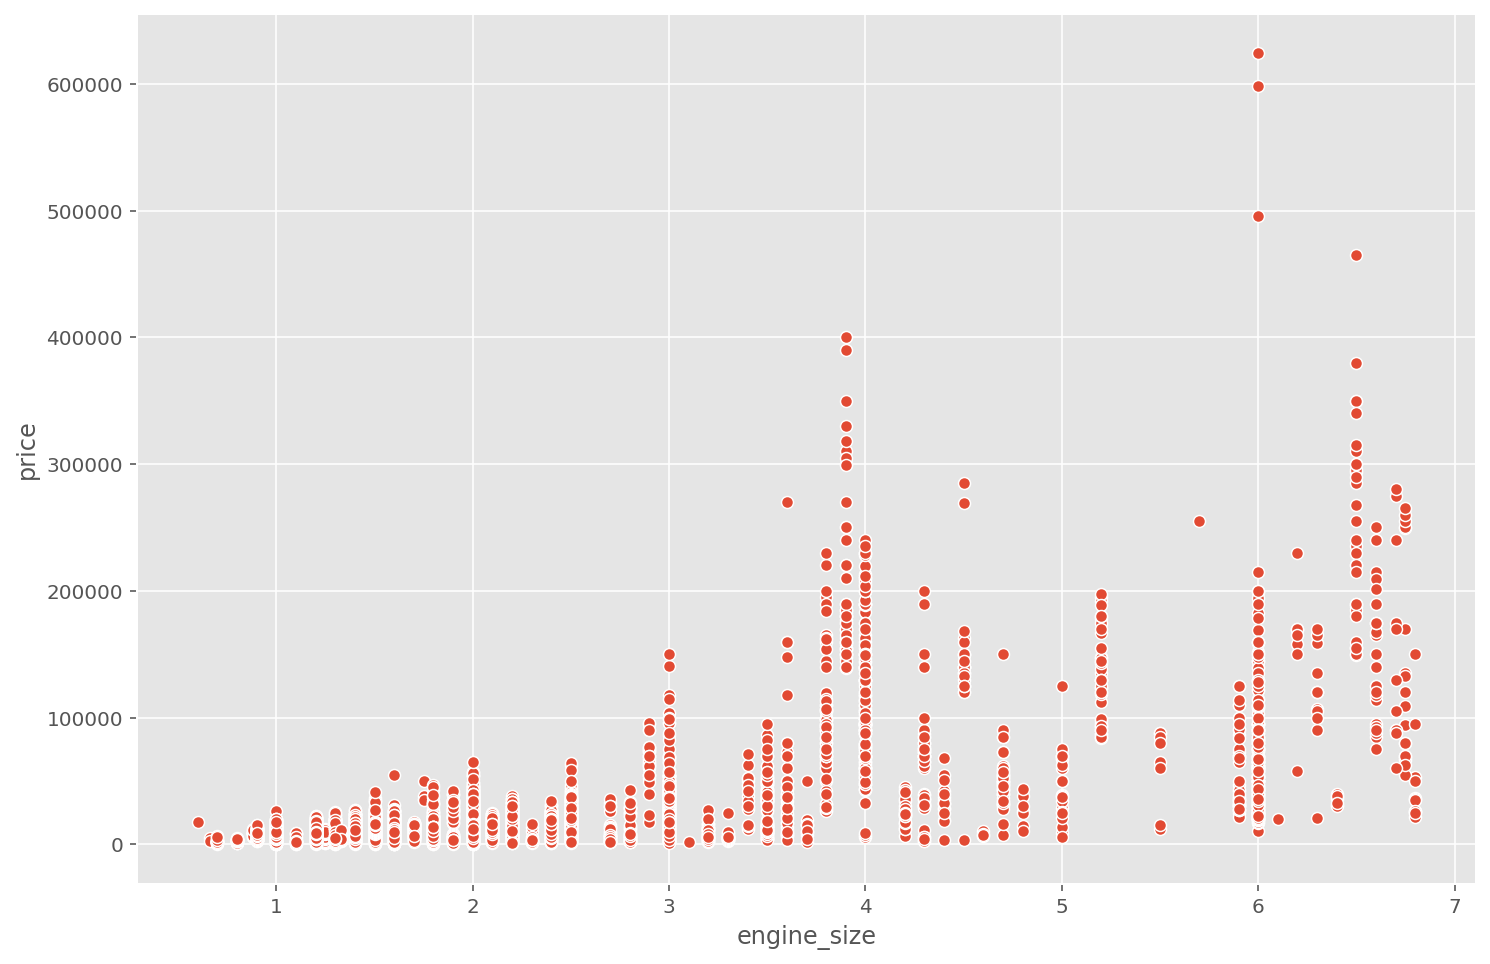

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.scatterplot(data=df, x='engine_size', y='price')
plt.show()

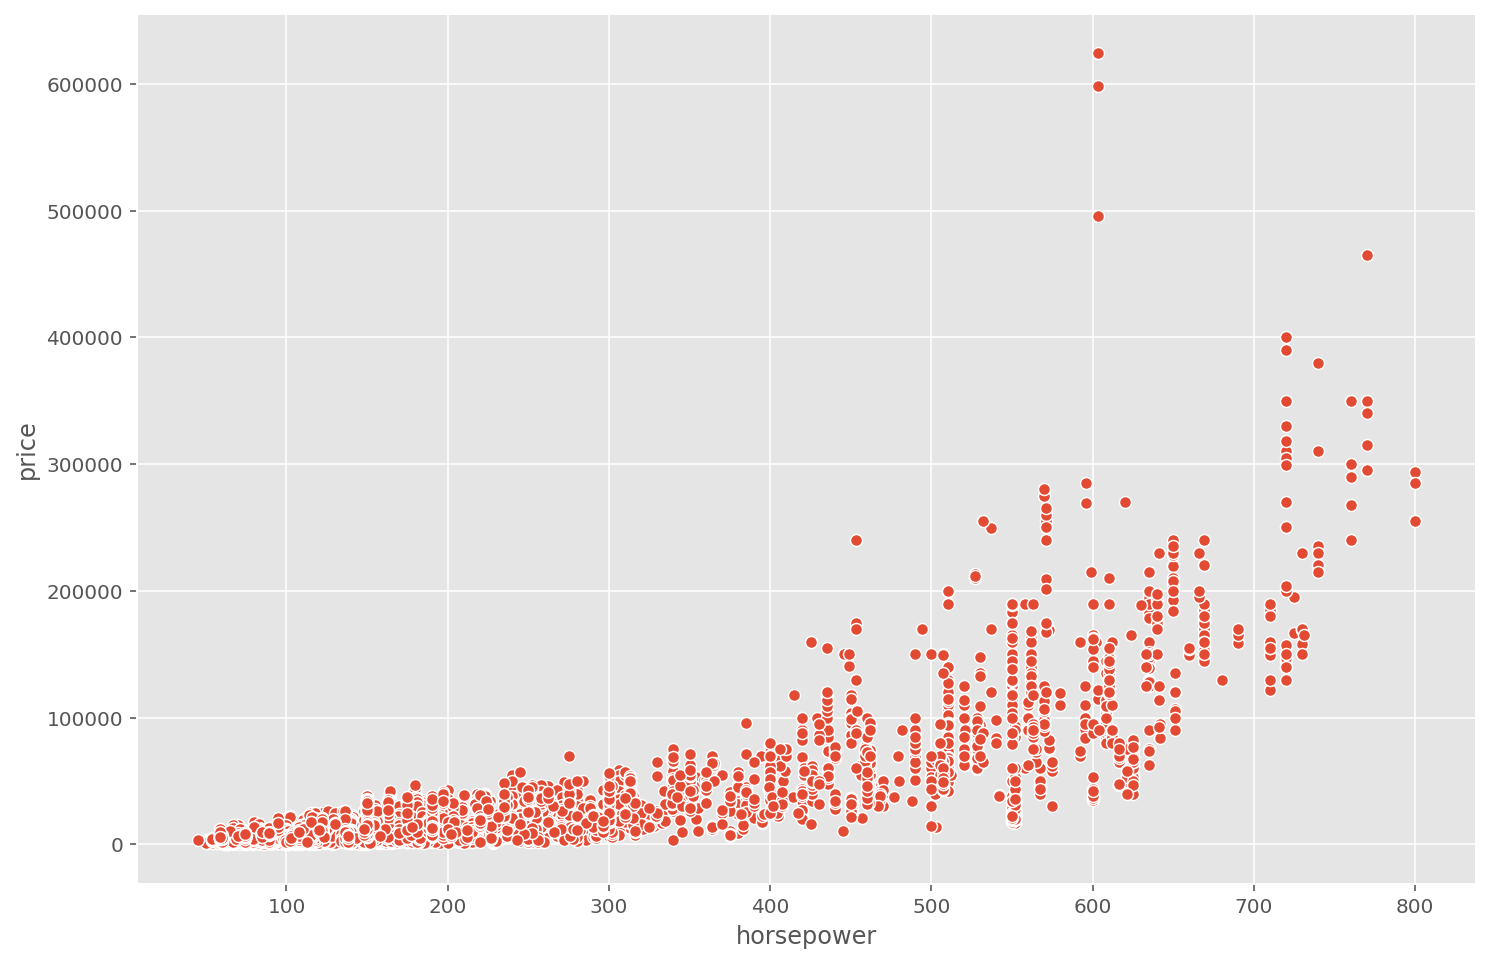

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.scatterplot(data=df, x='horsepower', y='price')
plt.show()

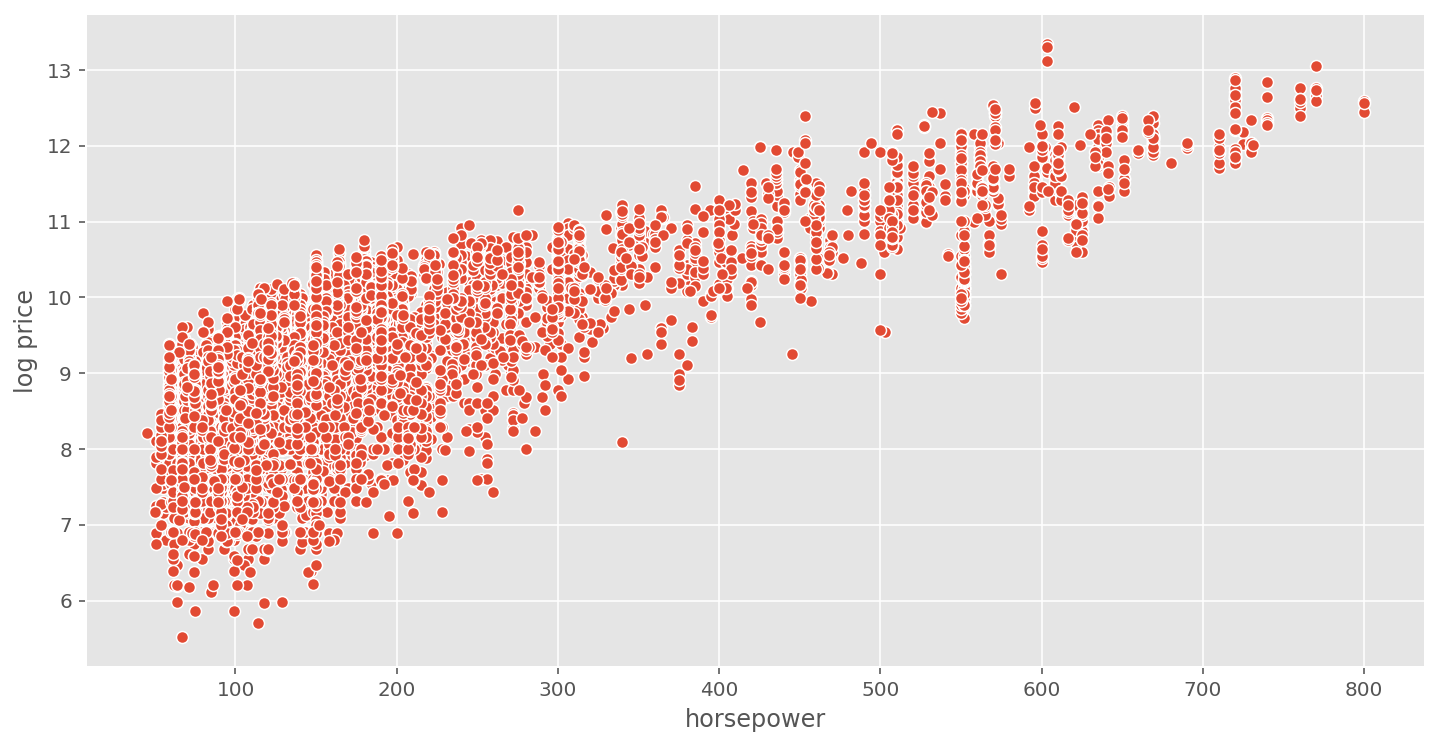

In [42]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.scatterplot(x=df.horsepower, y=np.log(df.price))
ax.set_ylabel('log price')
plt.show()

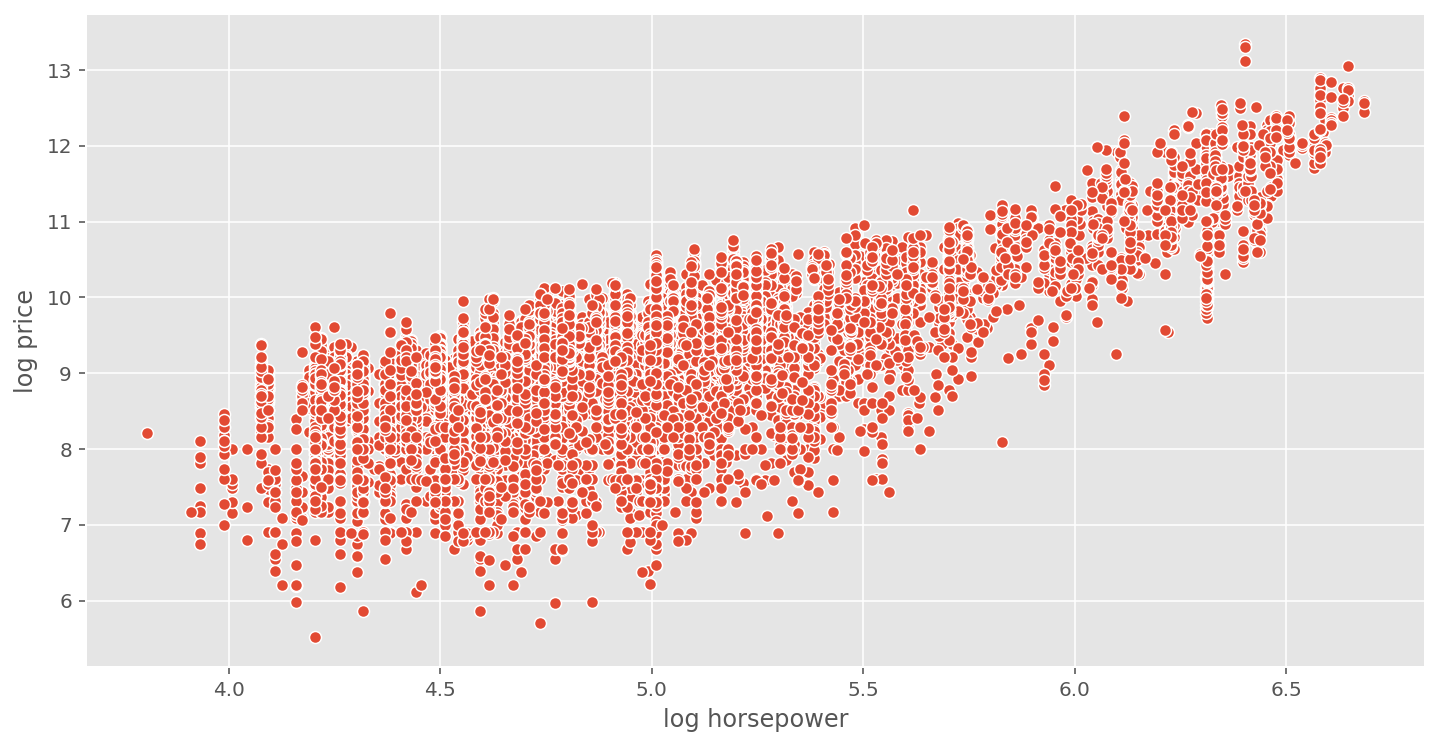

In [43]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.scatterplot(x=np.log(df.horsepower), y=np.log(df.price))
ax.set_ylabel('log price')
ax.set_xlabel('log horsepower')
plt.show()

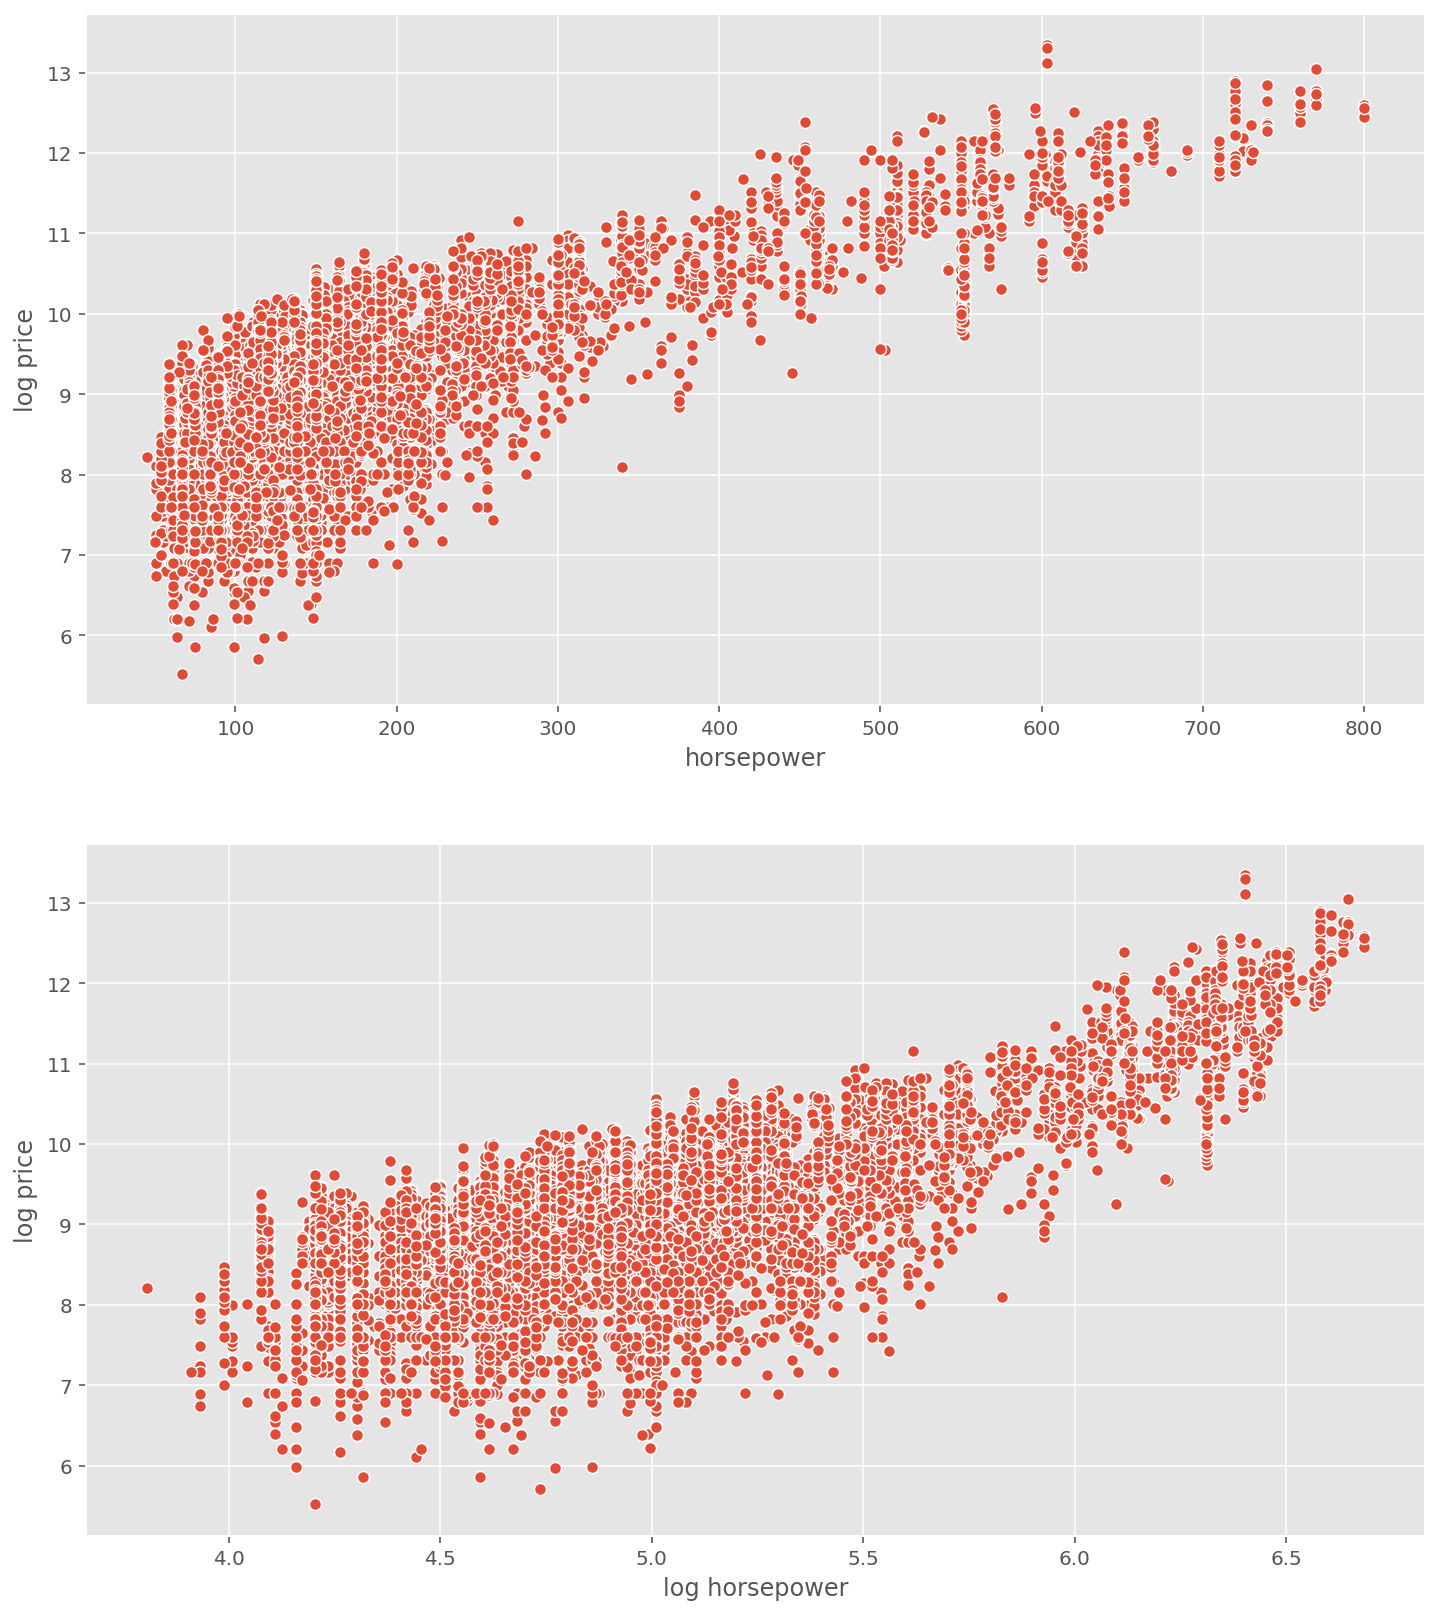

In [41]:
fig, ax = plt.subplots(2,1, figsize=(12,14))

sns.scatterplot(x=df.horsepower, y=np.log(df.price), ax=ax[0])
ax[0].set_ylabel('log price')

sns.scatterplot(x=np.log(df.horsepower), y=np.log(df.price), ax=ax[1])
ax[1].set_ylabel('log price')
ax[1].set_xlabel('log horsepower')
plt.show()

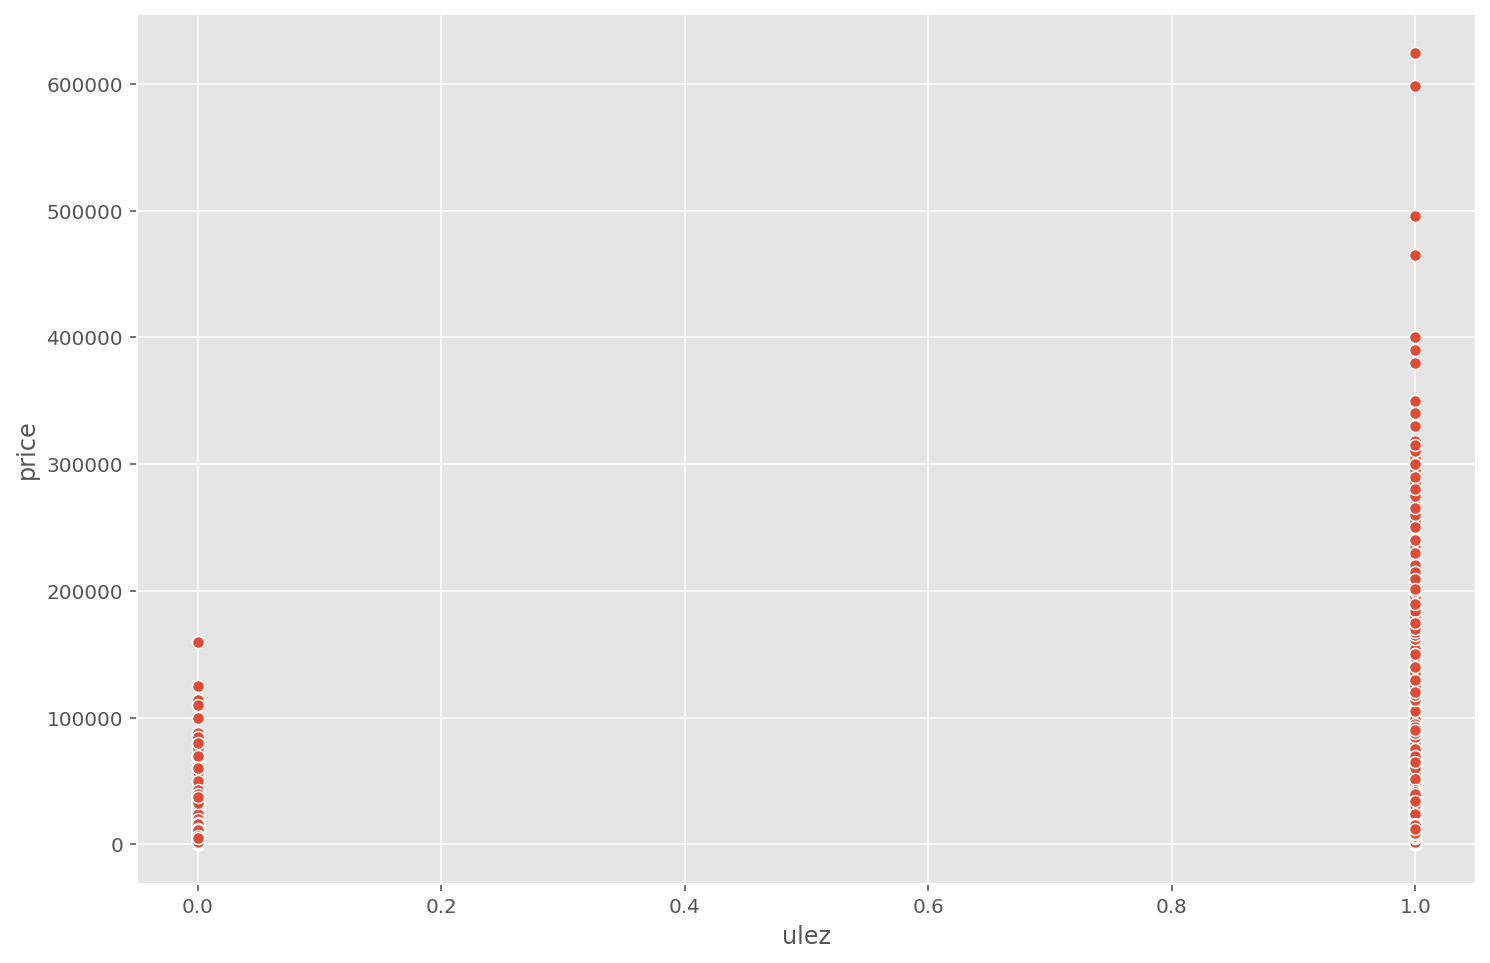

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.scatterplot(data=df, x='ulez', y='price')
plt.show()

### Distribution of 'Price'
---

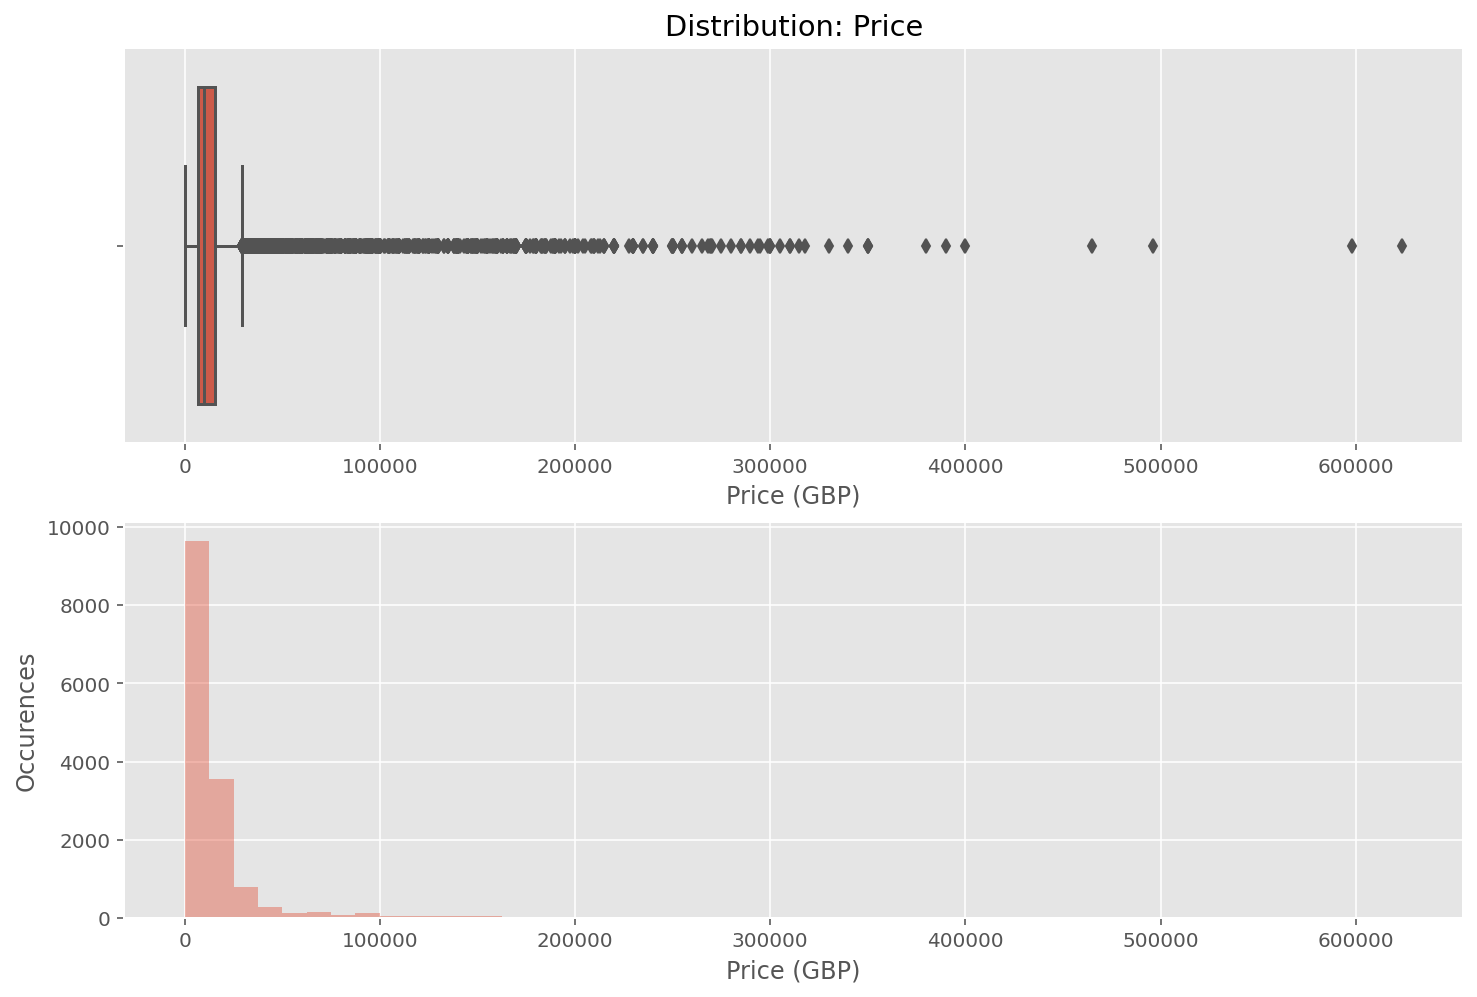

In [15]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
sns.boxplot(df.price, ax=ax[0])
sns.distplot(df.price, kde=False, ax=ax[1])

ax[0].set_title('Distribution: Price')
ax[0].set_xlabel('Price (GBP)')
ax[1].set_xlabel('Price (GBP)')
ax[1].set_ylabel('Occurences')

plt.show()

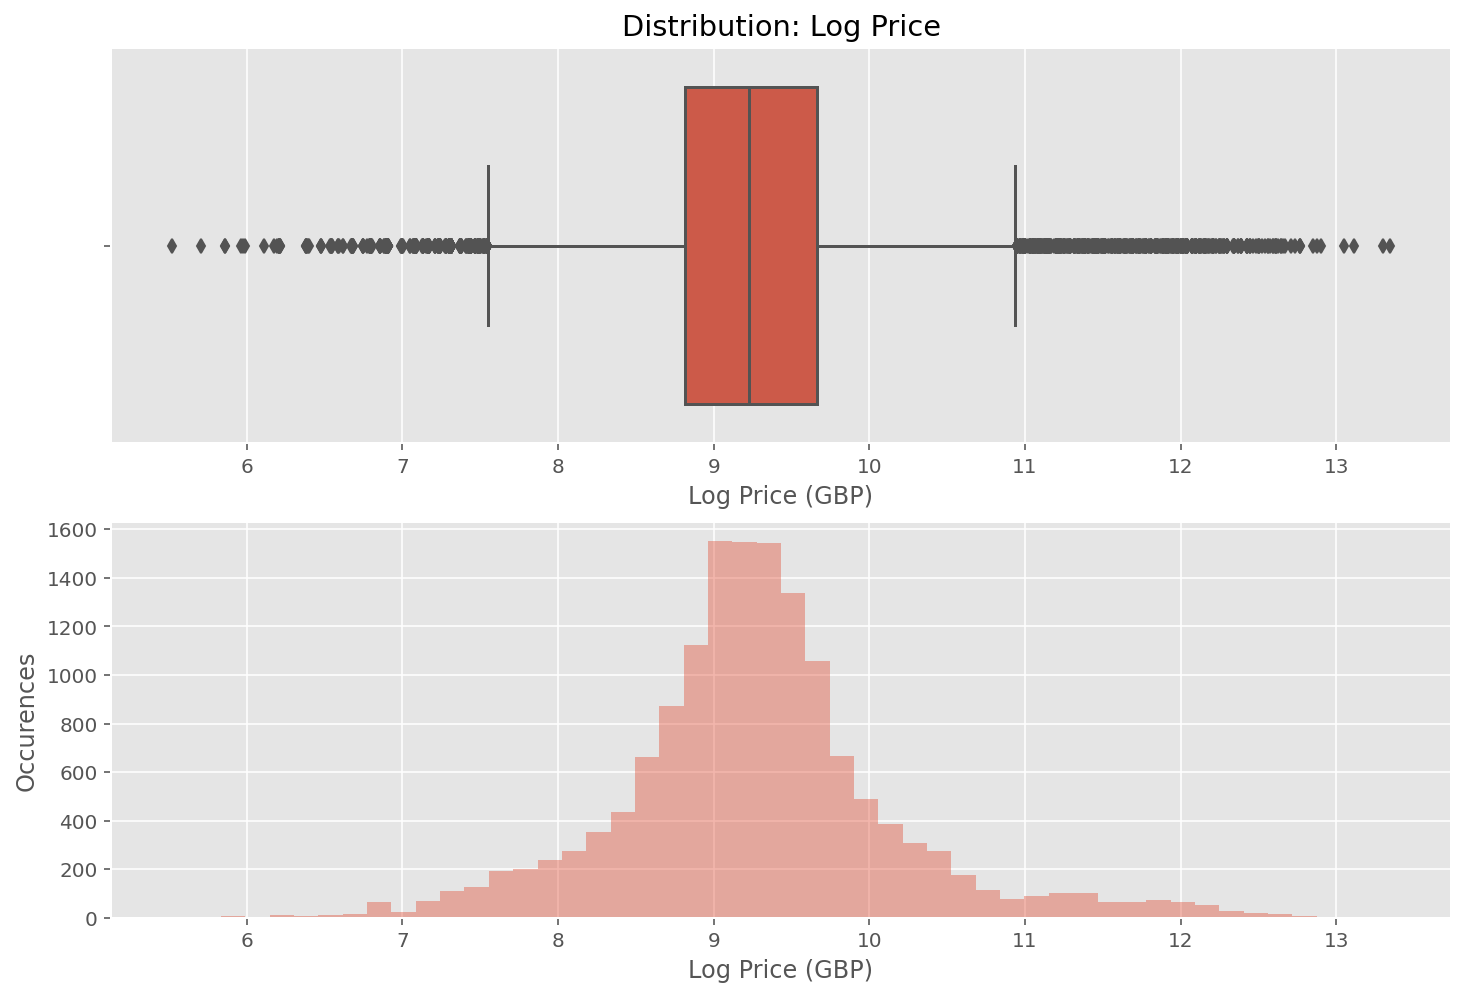

In [16]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
sns.boxplot(np.log(df.price), ax=ax[0])
sns.distplot(np.log(df.price), kde=False, ax=ax[1])

ax[0].set_title('Distribution: Log Price')
ax[0].set_xlabel('Log Price (GBP)')
ax[1].set_xlabel('Log Price (GBP)')
ax[1].set_ylabel('Occurences')

plt.show()

In [17]:
df.head()

year       body   mileage  engine_size  horsepower transmission    fuel  \
0  2008.0     estate  115000.0          2.0       168.0       manual  diesel   
1  2011.0  hatchback  112988.0          1.6       104.0    automatic  diesel   
2  2011.0        suv   96000.0          2.0       168.0       manual  petrol   
3  2015.0     saloon   97837.0          2.0       190.0    automatic  diesel   
4  2009.0      coupe   67345.0          1.8       168.0       manual  petrol   

   ulez   seller_type  price  make model  
0     0  trade_seller   3995  audi    a4  
1     0  trade_seller   4799  audi    a3  
2     1  trade_seller   8740  audi    q3  
3     1  trade_seller  10900  audi    a6  
4     1  trade_seller   6491  audi    a5

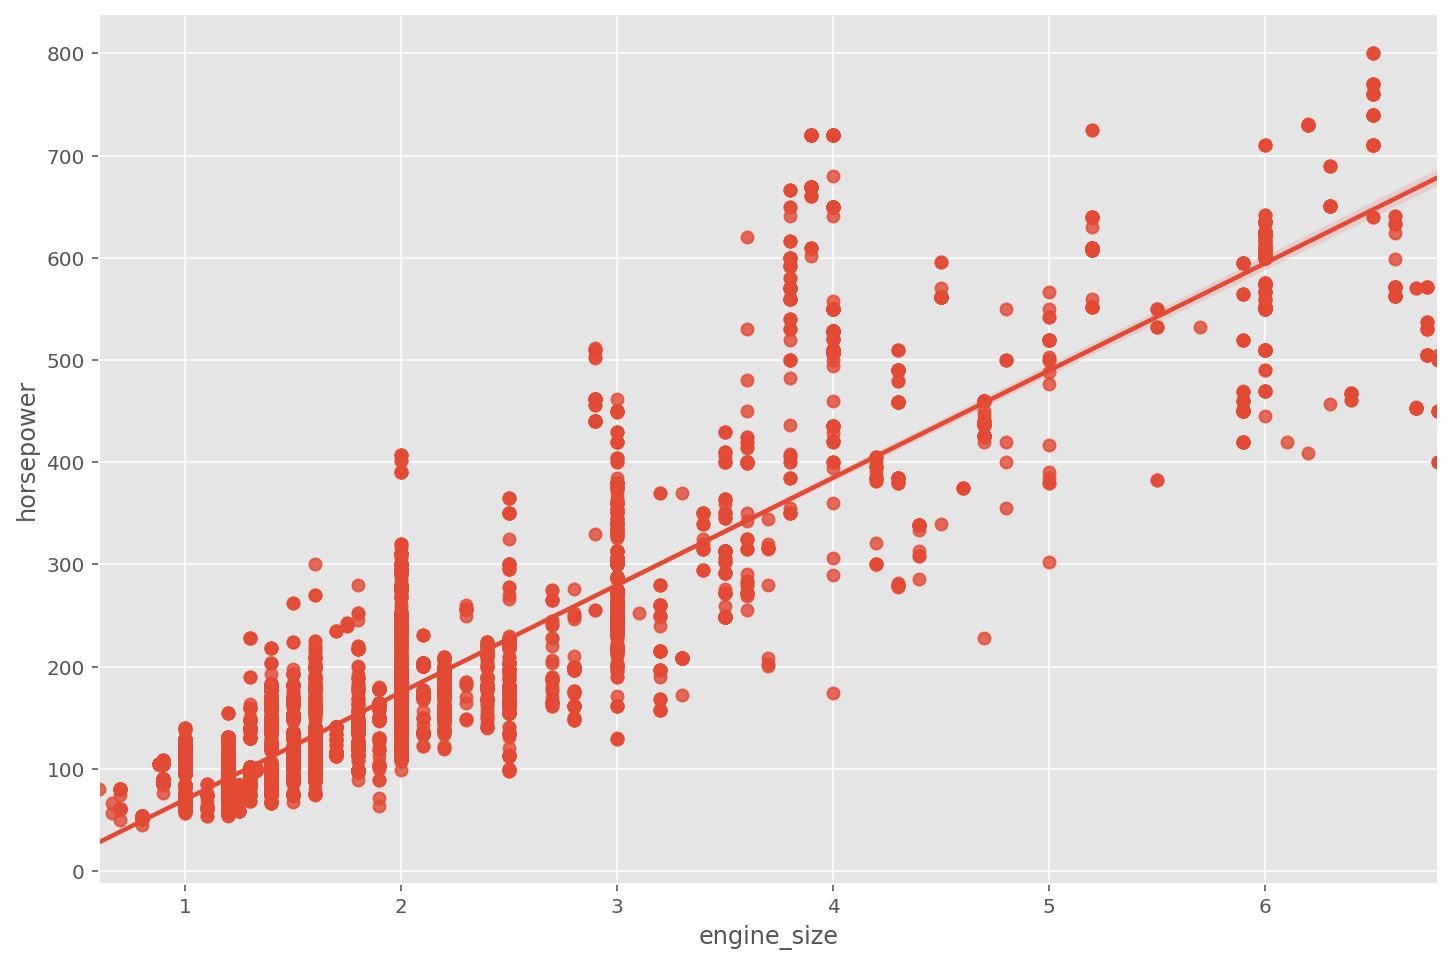

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.regplot(data=df, x='engine_size', y='horsepower')
plt.show()

In [19]:
df['bhp_per_litre'] = df.horsepower / df.engine_size
df.head()

year       body   mileage  engine_size  horsepower transmission    fuel  \
0  2008.0     estate  115000.0          2.0       168.0       manual  diesel   
1  2011.0  hatchback  112988.0          1.6       104.0    automatic  diesel   
2  2011.0        suv   96000.0          2.0       168.0       manual  petrol   
3  2015.0     saloon   97837.0          2.0       190.0    automatic  diesel   
4  2009.0      coupe   67345.0          1.8       168.0       manual  petrol   

   ulez   seller_type  price  make model  bhp_per_litre  
0     0  trade_seller   3995  audi    a4      84.000000  
1     0  trade_seller   4799  audi    a3      65.000000  
2     1  trade_seller   8740  audi    q3      84.000000  
3     1  trade_seller  10900  audi    a6      95.000000  
4     1  trade_seller   6491  audi    a5      93.333333

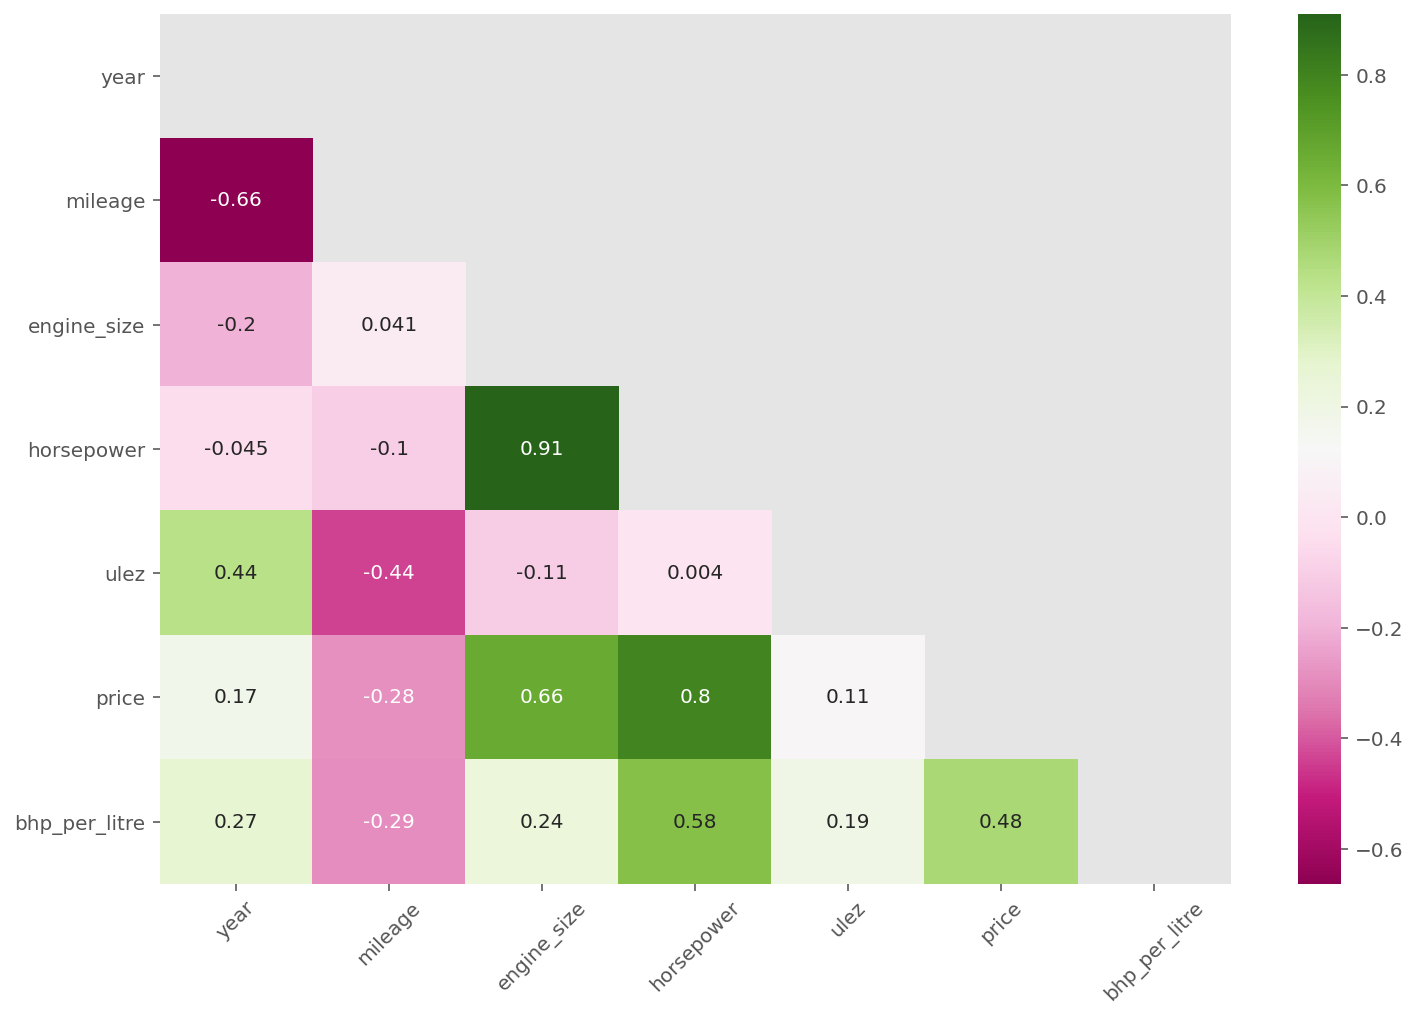

In [20]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), annot=True, cmap='PiYG', mask=mask, ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

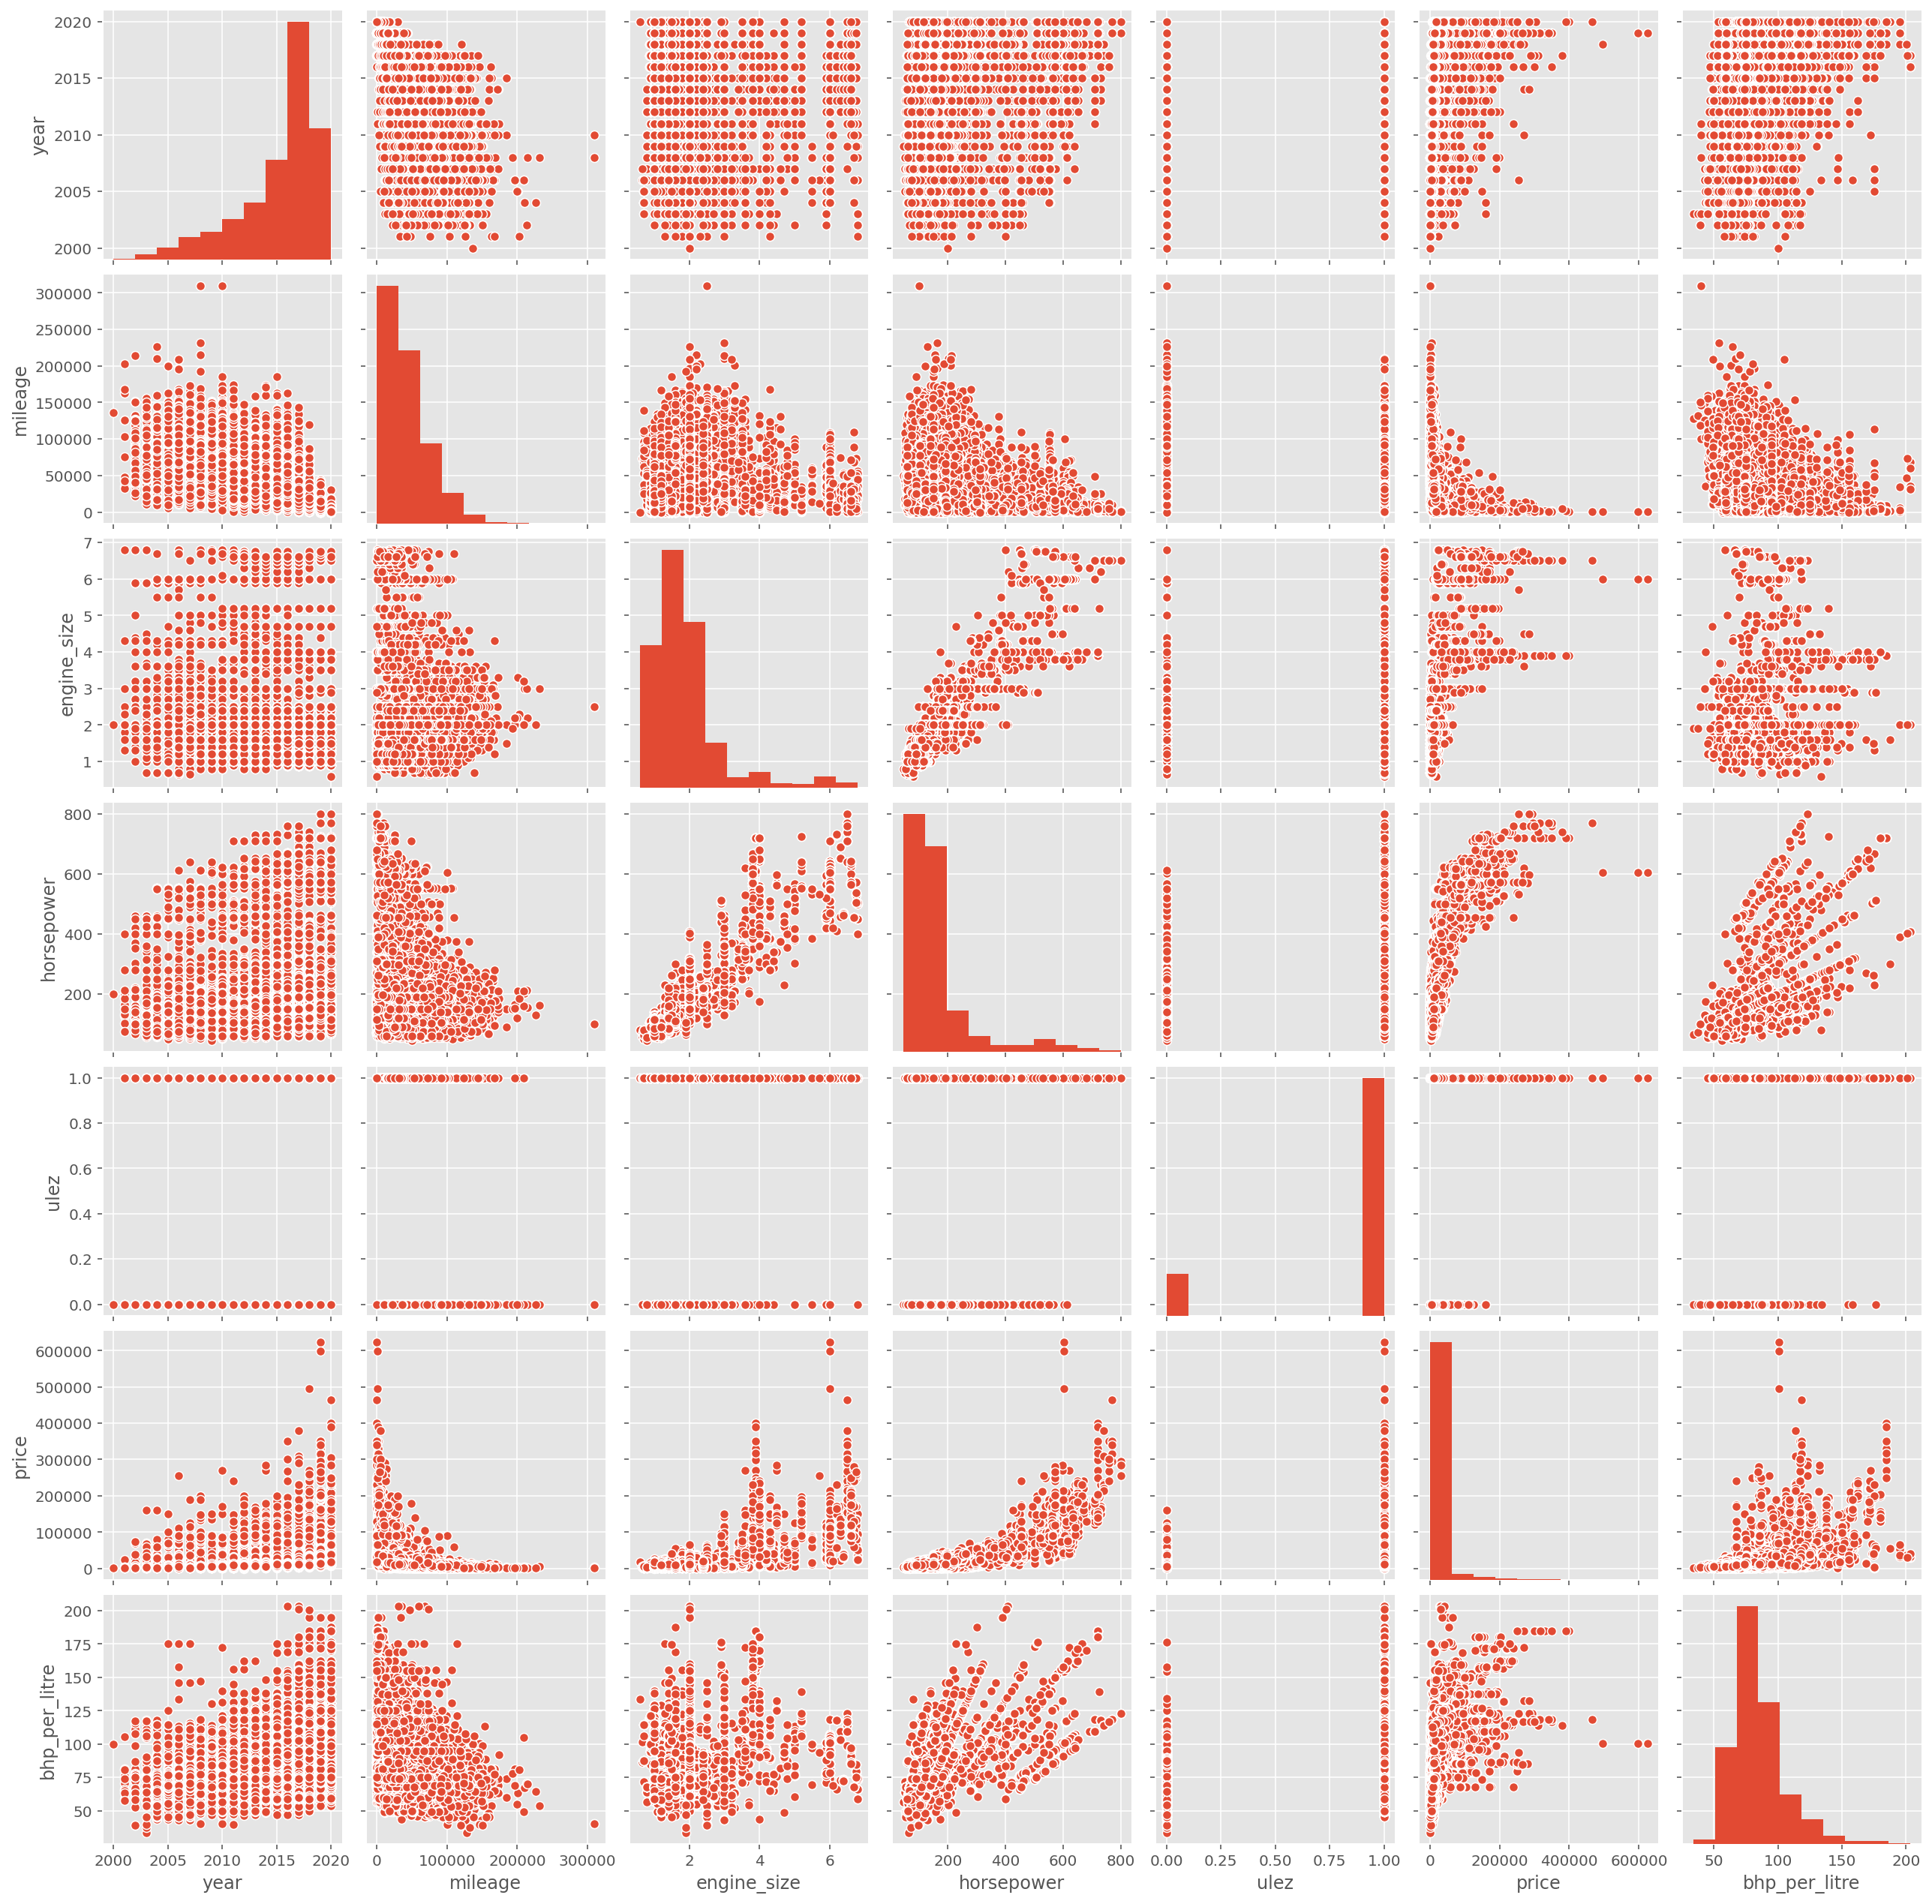

In [21]:
sns.pairplot(df)
plt.show()

In [21]:
# # dummify categorial variables
# features_categorical = ['body', 'transmission', 'fuel', 'ulez', 'seller_type', 'make', 'model']
# df = pd.get_dummies(df, columns=features_categorical, drop_first=True)

# df.head()

In [22]:
# write df to file

to_file = '../data/df_master_2.csv'
df.to_csv(to_file)